In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive/MyDrive/Colab Notebooks/yapay zeka veriler

/content/drive/MyDrive/Colab Notebooks/yapay zeka veriler


In [31]:
import numpy as np
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_path = './Dataset/train'
valid_path = './Dataset/val'
test_path = './Dataset/test'
img_size =  (224,224,3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 50

In [13]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             channel_shift_range = 10,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

In [14]:
train_dataset = datagen.flow_from_directory(directory = train_path, 
                                                  color_mode = "rgb",
                                                  target_size = (224,224),
                                                  interpolation = 'bicubic',
                                                  class_mode = "categorical", 
                                                  shuffle = True,
                                                  batch_size = BATCH_SIZE)

validation_dataset  = datagen.flow_from_directory(directory = valid_path,
                                            color_mode = "rgb",
                                            target_size = (224,224),
                                            interpolation = 'bicubic',
                                            class_mode = "categorical",
                                            shuffle = False,
                                            batch_size = BATCH_SIZE)
test_dataset  = datagen.flow_from_directory(directory = test_path,
                                           color_mode = "rgb",
                                           target_size = (224,224),
                                           interpolation = 'bicubic',
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = BATCH_SIZE)

Found 306 images belonging to 2 classes.
Found 131 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [15]:
import tensorflow as tf
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [16]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [17]:
base_model.trainable = False

In [18]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(8, 7, 7, 512)


In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 512)


In [21]:
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 2)


In [22]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [23]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [26]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/50
39/39 [==============================] - 90s 2s/step - loss: 4.7867 - accuracy: 0.5131 - val_loss: 4.7838 - val_accuracy: 0.3893
Epoch 2/50
39/39 [==============================] - 10s 261ms/step - loss: 4.6298 - accuracy: 0.5163 - val_loss: 3.7949 - val_accuracy: 0.4809
Epoch 3/50
39/39 [==============================] - 7s 181ms/step - loss: 3.8258 - accuracy: 0.5359 - val_loss: 2.8804 - val_accuracy: 0.4733
Epoch 4/50
39/39 [==============================] - 8s 213ms/step - loss: 4.2073 - accuracy: 0.5458 - val_loss: 3.3643 - val_accuracy: 0.5191
Epoch 5/50
39/39 [==============================] - 7s 186ms/step - loss: 3.8333 - accuracy: 0.5588 - val_loss: 2.7933 - val_accuracy: 0.5267
Epoch 6/50
39/39 [==============================] - 7s 182ms/step - loss: 4.0113 - accuracy: 0.5458 - val_loss: 2.7800 - val_accuracy: 0.5649
Epoch 7/50
39/39 [==============================] - 8s 207ms/step - loss: 3.7987 - accuracy: 0.5458 - val_loss: 2.5335 - val_accuracy: 0.5954
Epoch 8

In [27]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

11/11 [==============================] - 68s 7s/step - loss: 0.5687 - accuracy: 0.8046
Accuracy:  0.8045976758003235


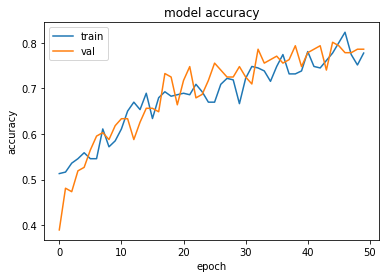

In [28]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

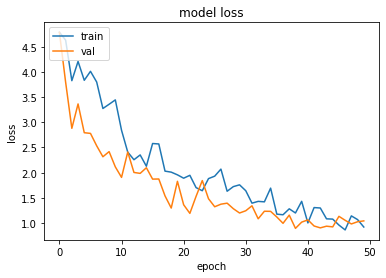

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import classification_report
test_labels = test_dataset.classes 
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, y_pred, target_names = test_dataset.class_indices))

11/11 [==============================] - 2s 146ms/step
              precision    recall  f1-score   support

       Curuk       0.77      0.79      0.78        29
        Taze       0.89      0.88      0.89        58

    accuracy                           0.85        87
   macro avg       0.83      0.84      0.83        87
weighted avg       0.85      0.85      0.85        87

